In [1]:
from my_plot_tools import plot_confusion_matrix

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [5]:
df_fake = pd.read_csv('./fake_news_set.csv')
df_real = pd.read_csv('./real_news_set.csv').sample(df_fake.shape[0]) # due to imba dataset

In [6]:
df = pd.concat([df_real, df_fake], axis=0).sample(frac=1)

In [7]:
df.groupby('label').size()

label
0    6822
1    6822
dtype: int64

## Using only Header

### Naive-Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
vect = CountVectorizer()
tfid = TfidfTransformer() 
X = vect.fit_transform(df['headline'].astype(str)).copy()
X = tfid.fit_transform(X)
y = df.loc[:, 'label'].copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=245)

In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
model.score(X_test, y_test)

0.7648783347991791

Normalized confusion matrix
[[0.75528701 0.24471299]
 [0.226082   0.773918  ]]


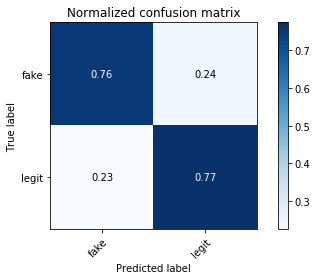

In [13]:
y_pred = model.predict(X_test)

assert y_pred.shape == y_test.shape
plot_confusion_matrix(y_test, y_pred, classes=np.array(['fake', 'legit']), normalize=True,
                      title='Normalized confusion matrix');

### SVM

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
model = SGDClassifier();
model.fit(X_train, y_train);

In [16]:
model.score(X_test, y_test)

0.7675168572266198

Normalized confusion matrix
[[0.73776435 0.26223565]
 [0.20444191 0.79555809]]


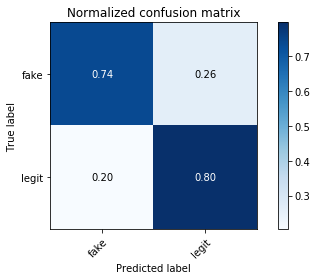

In [17]:
y_pred = model.predict(X_test)

assert y_pred.shape == y_test.shape
plot_confusion_matrix(y_test, y_pred, classes=np.array(['fake', 'legit']), normalize=True,
                      title='Normalized confusion matrix');